# Taylor Diagram<a id='top'></a>

This turorial is for creating Taylor Diagram using [UV-CDAT](https://uvcdat.llnl.gov)'s VCS.

Taylor diagrams are mathematical diagrams designed to graphically indicate which of several approximate representations (or models) of a system, process, or phenomenon is most realistic. This diagram, invented by Karl E. Taylor in 1994 (published in 2001) facilitates the comparative assessment of different models. It is used to quantify the degree of correspondence between the modeled and observed behavior in terms of three statistics: the Pearson correlation coefficient, the root-mean-square error (RMSE) error, and the standard deviation. Taylor diagrams have widely been used to evaluate models designed to study climate and other aspects of Earth’s environment. [See [Wiki](https://en.wikipedia.org/wiki/Taylor_diagram#cite_note-8) and [Taylor (2001)](http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract) for details]

Reference: [Taylor, K. E. 2001: Summarizing multiple aspects of model performance in a single diagram. Journal of Geophysical Research, 106(D7): 7183-7192](http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract)

© Software was developed by Charles Dutriaux and UVCDAT team, and tutorial was written by Charles Dutriaux and Jiwoo Lee. (18 Sep. 2017)

Used environment version in this tutorial:
- uvcdat 2.12
- vcs 2.12
- mesalib 17.2.0

## Contents: 
([Top](#top))
- [Create VCS canvas](#vcs)
- [Prepare input data](#input)
- [Reference Line](#ref_line)
- [Markers](#markers)
- [Alternative way of setting makers](#markers2)
- [Connecting line between dots](#lines)
- [Grouping using split lines](#lines2)
- [Legend](#legend)
- [Additional Axes](#axes)
- [Two quadrans Taylor Diagram](#2quad)
- [Controllable components](#comp)

## Create VCS canvas<a id='vcs'></a>
([Top](#top))

In [1]:
import vcs
x = vcs.init()

## Prepare input data<a id='input'></a>
([Top](#top))

Correlation and standard deviation are required. Here we create dummy input named as "data" for test.

In [2]:
# Create dummy 7 data
import MV2
corr = [.2, .5, .7, .85, .9, .95, .99]
std = [1.6, 1.7, 1.5, 1.2 , .8, .9, .98]
data = MV2.array(zip(std, corr))
data.id = "My Taylor Diagram Data"

print 'data:\n', data
print 'data shape:', data.shape

data:
[[ 1.6   0.2 ]
 [ 1.7   0.5 ]
 [ 1.5   0.7 ]
 [ 1.2   0.85]
 [ 0.8   0.9 ]
 [ 0.9   0.95]
 [ 0.98  0.99]]
data shape: (7, 2)


Plot the beginning version using VCS module. "vcs.createtaylordiagram" is for creating template. 

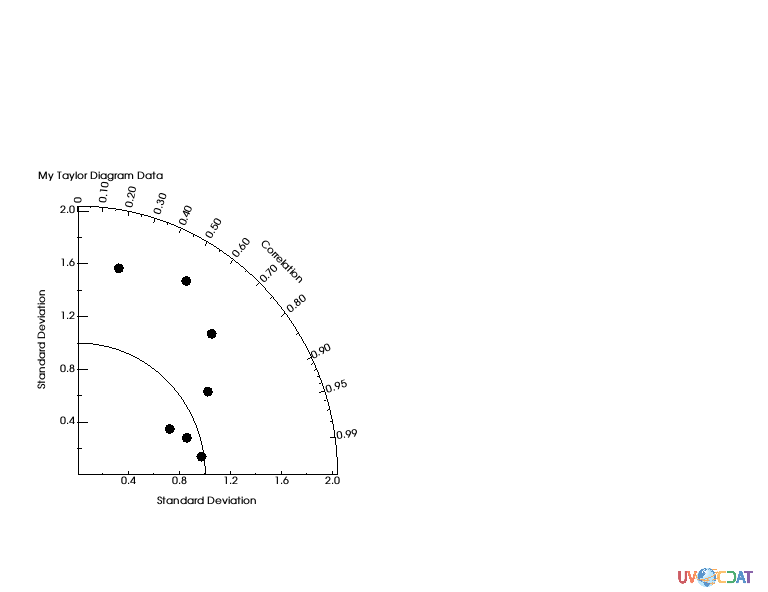

In [3]:
taylor = vcs.createtaylordiagram()
x.plot(data,taylor)

## Reference Line<a id='ref_line'></a>
([Top](#top))

Curved line in the plot indicates a reference line. Let's' your reference data (e.g. observation) has 1.2 as standard deviation. You may want to move the line to cross 1.2, as below.

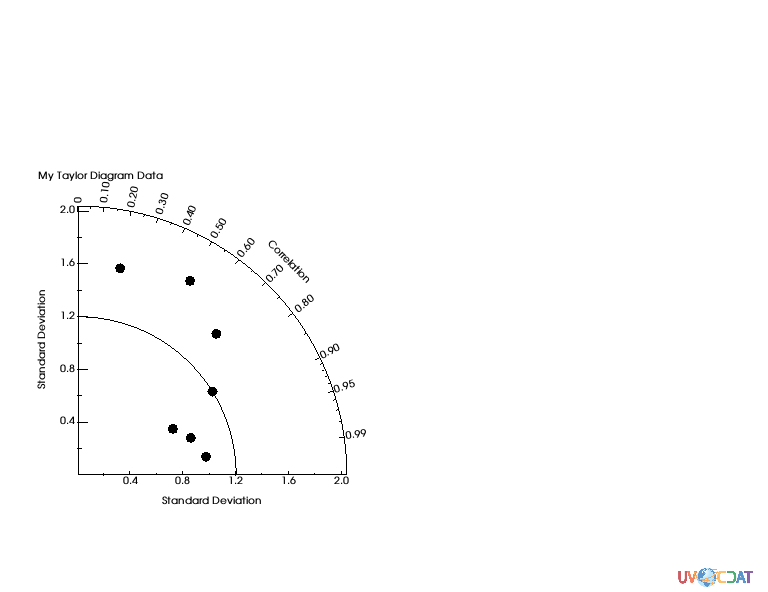

In [4]:
# Reference point
taylor.referencevalue=1.2
x.clear()
x.plot(data,taylor)

## Markers<a id='markers'></a>
([Top](#top))

You may want to identify dots where they are coming from. You can adjust marker as shape and/or string, and create the legend. 

In [5]:
# Markers attributes
ids = ["A1","A2","A3","B1","C1","C2","C3"]
id_sizes = [20., 15., 15., 15., 15., 15., 15.,]
id_colors = ["red","orange","green","cyan","blue","purple","black"]
symbols = ["square","dot","circle","triangle_right","triangle_left","triangle_up","triangle_down"]
colors = ["red","orange","green","cyan","blue","purple","black"]
sizes = [20., 5., 20., 20., 20., 20., 20.,]

For text strings:
- ids: Data id. It could be model or dataset names
- id_sizes: Size of text string
- id_colors: Color of text string

For symbols:
- symbols: Shape of markers
- colors: Color of markers
- sizes: Size of markers

"id_colors" and "colors" do not need to be identical.

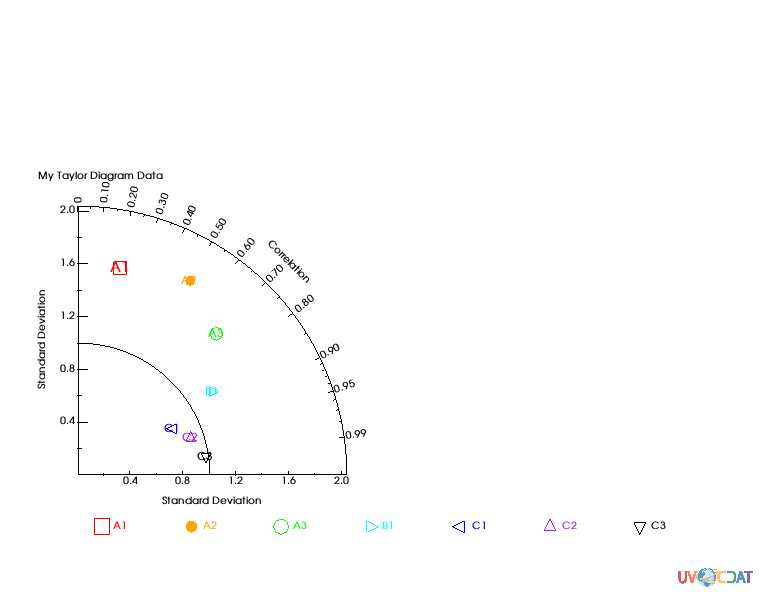

In [6]:
taylor = vcs.createtaylordiagram()
for i in range(len(data)):
    taylor.addMarker(id=ids[i],
                     id_size=id_sizes[i],
                     id_color=id_colors[i],
                     symbol=symbols[i],
                     color=colors[i],
                     size=sizes[i])
x.clear()
x.plot(data,taylor)

Adjust position of text string to avoid overlapping by using "xoffset" and "yoffset", which gives relative position from each of (x, y) points.

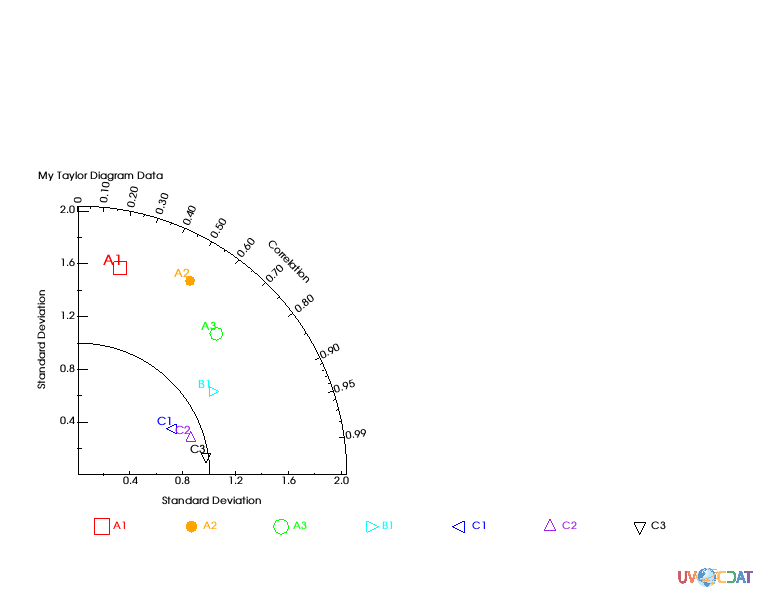

In [7]:
taylor = vcs.createtaylordiagram()
for i in range(len(data)):
    taylor.addMarker(id=ids[i],
                     id_size=id_sizes[i],
                     id_color=id_colors[i],
                     symbol=symbols[i],
                     color=colors[i],
                     size=sizes[i],
                     xoffset=-2.5,
                     yoffset=2.5)
x.clear()
x.plot(data,taylor)

## Alternative way of setting makers<a id='markers2'></a>
([Top](#top))

Instead of using for loop and "taylor.addMarker" function, you can store those pre-defined values to the Taylor diagram template directly.

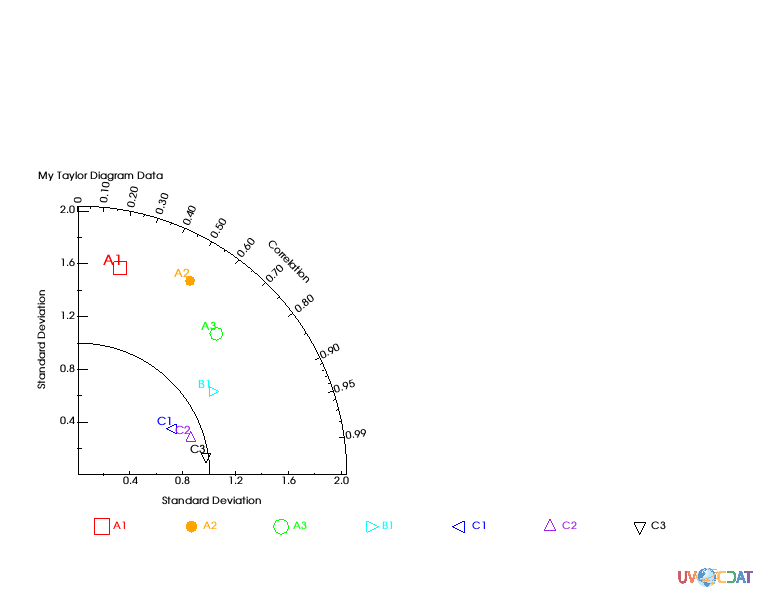

In [8]:
# Other way to set marker attributes
taylor = vcs.createtaylordiagram()
taylor.Marker.id = ids
taylor.Marker.id_size = id_sizes
taylor.Marker.id_color = id_colors
taylor.Marker.symbol = symbols
taylor.Marker.color = colors
taylor.Marker.size = sizes
taylor.Marker.xoffset = [-2.5,]*len(data)
taylor.Marker.yoffset = [2.5]*len(data)
x.clear()
x.plot(data,taylor)

## Connecting line between dots<a id='lines'></a>
([Top](#top))

If needed you can draw connecting lines between individual dots. Below example connects all dots in order of data

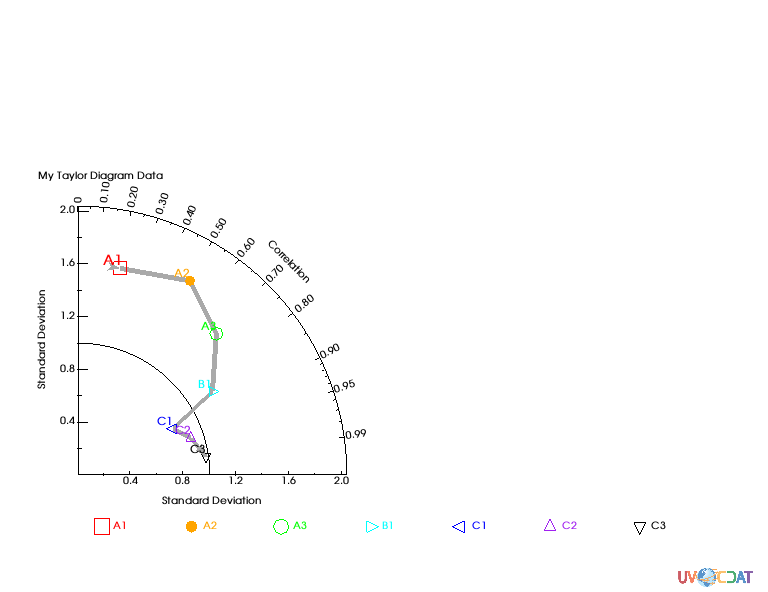

In [9]:
taylor.Marker.line = ["tail","line","line","line","line","line","head"]
taylor.Marker.line_type = ["solid",]*len(data)
taylor.Marker.line_color = ["dark grey",]*len(data)
taylor.Marker.line_size = [5.,5.,5.,5.,5.,5.,5.]
x.clear()
x.plot(data,taylor)

## Grouping using split lines<a id='lines2'></a>
([Top](#top))

Let's assume that you want to group your data. You can split lines by giving "None" for one of lines.

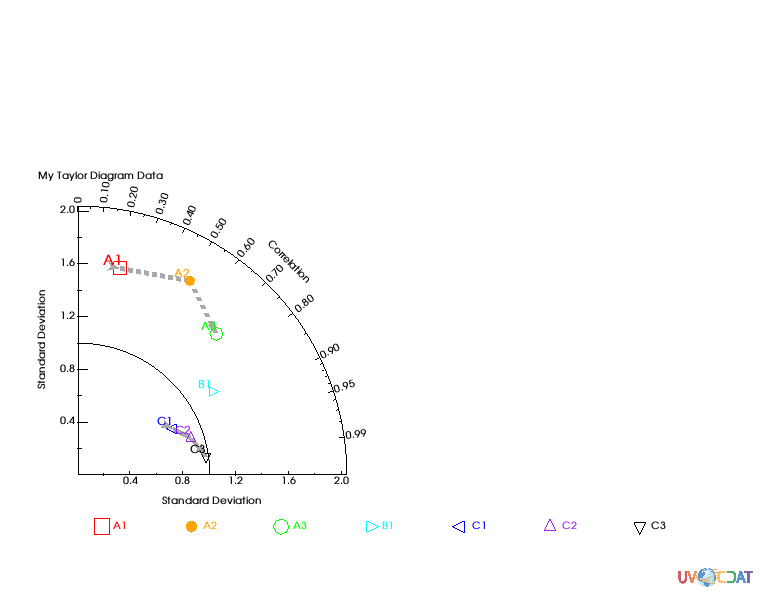

In [10]:
#let's split the line into 2 set of line with an empty marker in-between
# First line dashed
taylor.Marker.line =  ['tail', 'line', 'head', None, 'tail', 'line', 'head']
taylor.Marker.line_type = ["dash","dash","dash","solid","solid","solid","solid"]
x.clear()
x.plot(data,taylor)

## Legend<a id='legend'></a>
([Top](#top))

You can add separate legend where you want. 
- x1, x2, y1, y2: in ratio. Full page width and length are considered as 1.  

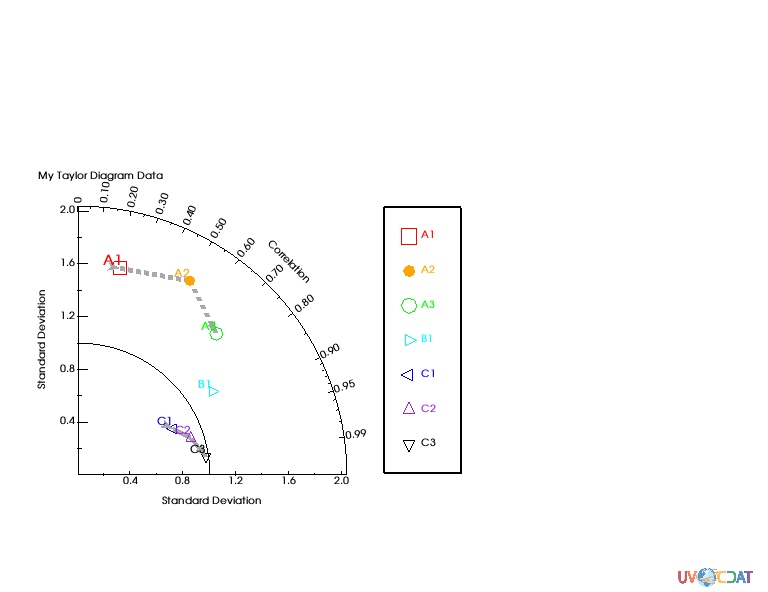

In [11]:
# Legend postionment for 1 quadran
x.clear()
template = vcs.createtemplate(source="deftaylor")
template.legend.x1 = .5
template.legend.x2 = .6
template.legend.y1 = .2
template.legend.y2 = .65
template.legend.line = "black"
x.plot(data,taylor,template)

## Additional Axes<a id='axes'></a>
([Top](#top))

- You can add aditional isoline to show additional measure of skill. 
- See Figure 10 and 11 of "[Taylor 2001: Summarizing multiple aspects of model performance in a single diagram, Journal of Geophysical Research, 106(D7): 7183-7192](http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract)", for details. 

/Users/doutriaux1/anaconda2/envs/nightly2/lib/python2.7/site-packages/vcs/VTKPlots.py:1005: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  data[:] = numpy.ma.masked_invalid(data, numpy.nan)


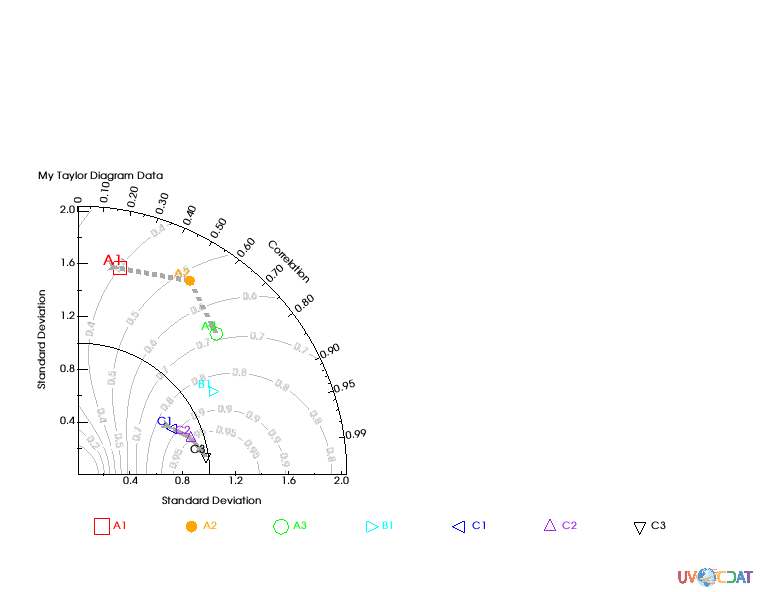

In [12]:
#Skill scrores
x.clear()
x.plot(data,taylor,skill=taylor.defaultSkillFunction)

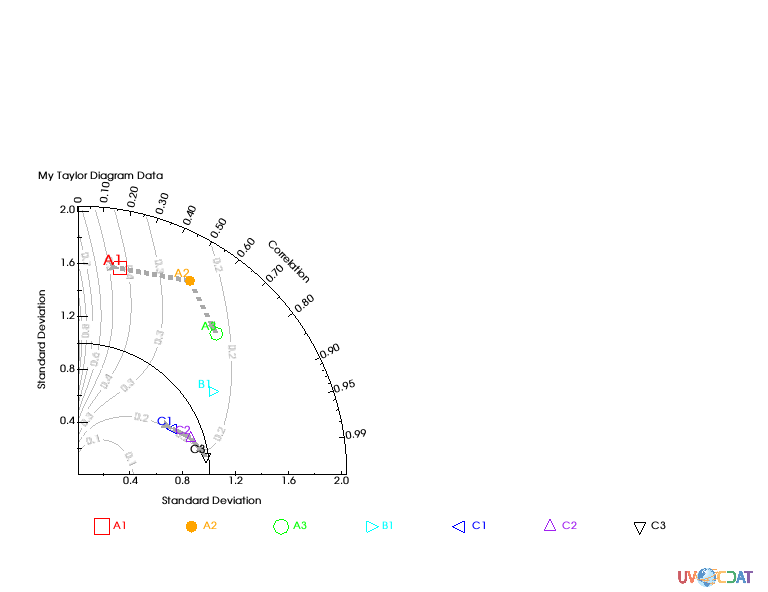

In [13]:
import numpy
def mySkill(s,r):
    return (4*numpy.ma.power(1+r,4))/(numpy.power(s+1./s,2)*numpy.power(1+r*2.,4))
x.clear()
x.plot(data,taylor,skill=mySkill)

## Two quadrans Taylor Diagram<a id='2quad'></a>
([Top](#top))

- When you have negative value for correlation you may want to expend your plot to the other side. 
- See Figure 2 of "[Taylor 2001: Summarizing multiple aspects of model performance in a single diagram, Journal of Geophysical Research, 106(D7): 7183-7192](http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract)", for details. 

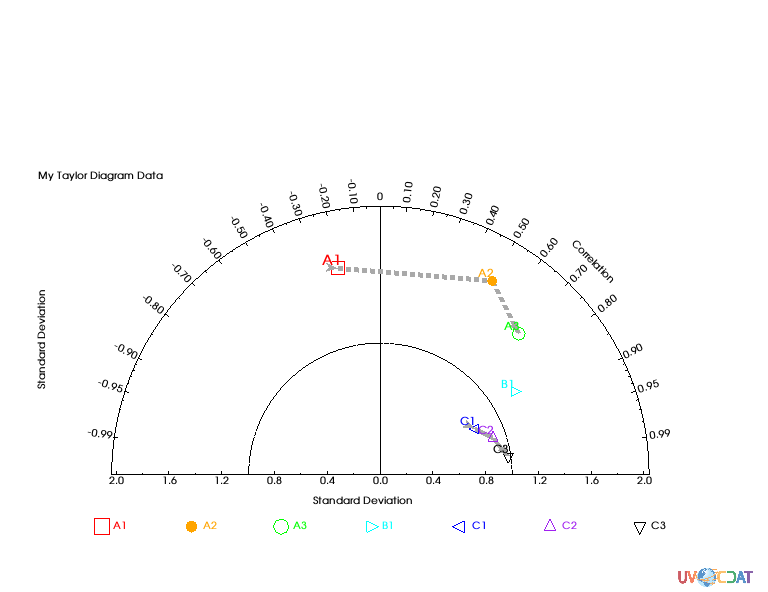

In [14]:
# Negative correlation: Two quadrans
taylor.quadrans = 2 # default: 1

# Tweak input data to have negative number
data2 = data.copy()
data2[0,1] = -data2[0,1]

# Plot
x.clear()
x.plot(data2,taylor)

## Controllable components<a id='comp'></a>
([Top](#top))

"taylor.list()" allows you to check available controllable components

In [15]:
taylor = vcs.createtaylordiagram()
taylor.list()

---------- Taylordiagram (Gtd) member (attribute) listings ----------
graphic method = Gtd
name = __taylordiagram_714979654657298
detail = 75
max = None
quadrans = 1
skillValues = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
skillColor = (74.50980392156863, 74.50980392156863, 74.50980392156863, 100.0)
skillDrawLabels = y
skillCoefficient = [1.0, 1.0, 1.0]
idsLocation = 0
referencevalue = 1.0
arrowlength = 0.05
arrowangle = 20.0
arrowbase = 0.75
xticlabels1 = *
xmtics1 = *
yticlabels1 = *
ymtics1 = *
cticlabels1 = *
cmtics1 = *
Marker
    status =  []
    line =  []
    id =  []
    id_size =  []
    id_color =  []
    id_font =  []
    id_location =  []
    symbol =  []
    color =  []
    size =  []
    xoffset =  []
    yoffset =  []
    line_color =  []
    line_size =  []
    line_type =  []


![test](https://user-images.githubusercontent.com/2781425/29979756-9cc4169c-8efb-11e7-8b84-7be02b099c2b.jpg)